In [53]:
import pandas as pd

In [54]:
import numpy as np

In [118]:
data_frame1 = pd.read_csv("yellow_tripdata_2018-01.csv", nrows = 1000,usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance','PULocationID','fare_amount'])
data_frame1.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,fare_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5,41,4.5
1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7,239,14.0
2,2018-01-01 00:08:26,2018-01-01 00:14:21,0.8,262,6.0
3,2018-01-01 00:20:22,2018-01-01 00:52:51,10.2,140,33.5
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2.5,246,12.5


In [56]:
t1 = pd.to_datetime(data_frame1['tpep_pickup_datetime'])
t2 = pd.to_datetime(data_frame1['tpep_dropoff_datetime'])

In [123]:
time_diff = t2-t1
time_diff_float = time_diff.astype('timedelta64[m]')
time_diff_float


0       3.0
1      18.0
2       5.0
3      32.0
4      17.0
5       3.0
6      10.0
7       2.0
8       4.0
9       5.0
10      5.0
11     24.0
12      4.0
13      9.0
14     15.0
15     17.0
16     42.0
17      4.0
18     36.0
19      5.0
20     19.0
21     12.0
22     21.0
23     26.0
24     12.0
25      4.0
26     22.0
27      2.0
28      7.0
29      6.0
       ... 
970     4.0
971    11.0
972    17.0
973    30.0
974    20.0
975    47.0
976     2.0
977    10.0
978    11.0
979    15.0
980     6.0
981     3.0
982     5.0
983    14.0
984    32.0
985    15.0
986     4.0
987    11.0
988    33.0
989     9.0
990     4.0
991     5.0
992    10.0
993    14.0
994    30.0
995    10.0
996    20.0
997     3.0
998    19.0
999    14.0
Length: 1000, dtype: float64

In [61]:
time_diff.mean()  #considerando mille righe un viaggio dura in media 18 minuti e 23 secondi

Timedelta('0 days 00:18:23.236000')

In [62]:
df1['Date_pickup'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.date
df1['Time_pickup'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.time
df1['Date_dropoff'] = pd.to_datetime(df1['tpep_dropoff_datetime']).dt.date
df1['Time_dropoff'] = pd.to_datetime(df1['tpep_dropoff_datetime']).dt.time

In [63]:
data_frame_borough = pd.read_csv("name_borought.csv", usecols = ['Borough','LocationID'])

In [64]:
data_frame_borough.tail()

,LocationID,Borough
260,261,Manhattan
261,262,Manhattan
262,263,Manhattan
263,264,Unknown
264,265,Unknown


In [65]:
datafm2 = df1.join(data_frame_borough, lsuffix='_df1', rsuffix='_data_frame_borough')


In [66]:
datafm2['time_diff_float'] = time_diff_float


In [67]:
datafm2.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
trip_distance            float64
PULocationID               int64
fare_amount              float64
Date_pickup               object
Time_pickup               object
Date_dropoff              object
Time_dropoff              object
LocationID               float64
Borough                   object
time_diff_float          float64
dtype: object

In [68]:
datafm2.dropna(subset=['time_diff_float'], how='all', inplace = True)

In [69]:
datafm2.dropna(subset=['Borough'], how='all', inplace = True)

In [70]:
datafm2.dropna(subset=['LocationID'], how='all', inplace = True)

In [71]:
datafm2.dropna(subset=['trip_distance'], how='all', inplace = True)

In [72]:
datafm2.dropna(subset=['fare_amount'], how='all', inplace = True)

In [73]:
grouped = datafm2.groupby('Borough')

In [130]:
for name,group in datafm2.groupby(['Borough']):
    print (name)
    print (group)

Bronx
    tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  PULocationID  \
2    2018-01-01 00:08:26   2018-01-01 00:14:21           0.80           262   
17   2018-01-01 00:21:45   2018-01-01 00:25:58           0.60           163   
19   2018-01-01 00:15:42   2018-01-01 00:21:38           1.22           236   
30   2018-01-01 00:49:20   2018-01-01 00:57:58           1.20           236   
31   2018-01-01 00:13:37   2018-01-01 00:23:52           2.70           142   
45   2018-01-01 00:42:46   2018-01-01 00:44:41           0.10           164   
46   2018-01-01 00:48:05   2018-01-01 00:55:15           0.20           164   
50   2018-01-01 00:17:28   2018-01-01 00:37:38           2.80           142   
57   2018-01-01 00:51:26   2018-01-01 01:00:53           1.76           144   
58   2018-01-01 01:02:39   2018-01-01 01:04:02           0.09            87   
59   2018-01-01 01:02:39   2018-01-01 01:04:02           0.09            87   
68   2018-01-01 00:17:15   2018-01-01 00:37:37

In [75]:
grouped.get_group('Manhattan').describe()
##se consideriamo il borough manhattan(in 1000 righe) un viaggio di 3.39miles(media) dura in media
#15 minuti e 42 secondi < della durata media di un viaggio se si considerano tutti i borough(new york)

,trip_distance,PULocationID,fare_amount,LocationID,time_diff_float
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,3.484348,161.811594,15.775362,147.434783,0.010900
std,4.256994,65.334946,15.965850,72.530821,0.007222
min,0.170000,13.000000,2.500000,4.000000,0.000382
25%,1.170000,132.000000,7.500000,100.000000,0.005289
50%,2.160000,145.000000,11.500000,144.000000,0.008981
75%,3.520000,233.000000,16.500000,224.000000,0.015729
max,22.070000,264.000000,113.000000,263.000000,0.035590


In [76]:
grouped.describe()

LocationID                                                       \
                   count        mean        std    min     25%    50%     75%   
Borough                                                                         
Bronx               43.0  146.837209  80.463813    3.0   64.50  168.0  212.50   
Brooklyn            61.0  108.393443  73.652626   11.0   49.00   85.0  177.00   
EWR                  1.0    1.000000        NaN    1.0    1.00    1.0    1.00   
Manhattan           69.0  147.434783  72.530821    4.0  100.00  144.0  224.00   
Queens              69.0  128.565217  73.467576    2.0   73.00  131.0  193.00   
Staten Island       20.0  137.250000  77.914173    5.0   95.25  137.0  204.50   
Unknown              2.0  264.500000   0.707107  264.0  264.25  264.5  264.75   

                     PULocationID              ...   time_diff_float  \
                 max        count        mean  ...               75%   
Borough                                        ...                     
Bronx          259.0         43.0  162.372093  ...          0.014253   
Brooklyn       257.0         61.0  179.737705  ...          0.010660   
EWR              1.0          1.0   41.000000  ...          0.002292   
Manhattan      263.0         69.0  161.811594  ...          0.015729   
Queens         260.0         69.0  187.318841  ...          0.012963   
Staten Island  251.0         20.0  148.300000  ...          0.012792   
Unknown        265.0          2.0  147.500000  ...          0.006994   

                        trip_distance                                          \
                    max         count      mean       std   min     25%   50%   
Borough                                                                         
Bronx          0.031053          43.0  2.972558  4.000280  0.09  0.9000  1.88   
Brooklyn       0.031007          61.0  2.517049  3.014610  0.20  0.8000  1.52   
EWR            0.002292           1.0  0.500000       NaN  0.50  0.5000  0.50   
Manhattan      0.035590          69.0  3.484348  4.256994  0.17  1.1700  2.16   
Queens         0.025521          69.0  2.604493  2.922699  0.00  0.9000  1.80   
Staten Island  0.020544          20.0  2.782500  2.670994  0.50  1.3375  1.90   
Unknown        0.007292           2.0  2.150000  0.494975  1.80  1.9750  2.15   

                             
                 75%    max  
Borough                      
Bronx          3.385  24.00  
Brooklyn       3.000  18.40  
EWR            0.500   0.50  
Manhattan      3.520  22.07  
Queens         2.840  17.90  
Staten Island  3.075  12.70  
Unknown        2.325   2.50  

[7 rows x 40 columns]

In [77]:
 grouped[['trip_distance','time_diff_float']].corr()

trip_distance  time_diff_float
Borough                                                      
Bronx         trip_distance         1.000000         0.708914
              time_diff_float       0.708914         1.000000
Brooklyn      trip_distance         1.000000         0.606522
              time_diff_float       0.606522         1.000000
EWR           trip_distance              NaN              NaN
              time_diff_float            NaN              NaN
Manhattan     trip_distance         1.000000         0.746053
              time_diff_float       0.746053         1.000000
Queens        trip_distance         1.000000         0.743820
              time_diff_float       0.743820         1.000000
Staten Island trip_distance         1.000000         0.435127
              time_diff_float       0.435127         1.000000
Unknown       trip_distance         1.000000         1.000000
              time_diff_float       1.000000         1.000000

In [78]:
#the pearson coefficient is significant for manhattan(0.7460) and queens(0.7438)


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
import matplotlib.pyplot as plt

In [92]:
from sklearn.preprocessing import scale

In [99]:
import seaborn as sns

In [100]:
from pylab import rcParams

In [101]:
%matplotlib inline

C:\Users\utente\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'correlation between time and trip distance')

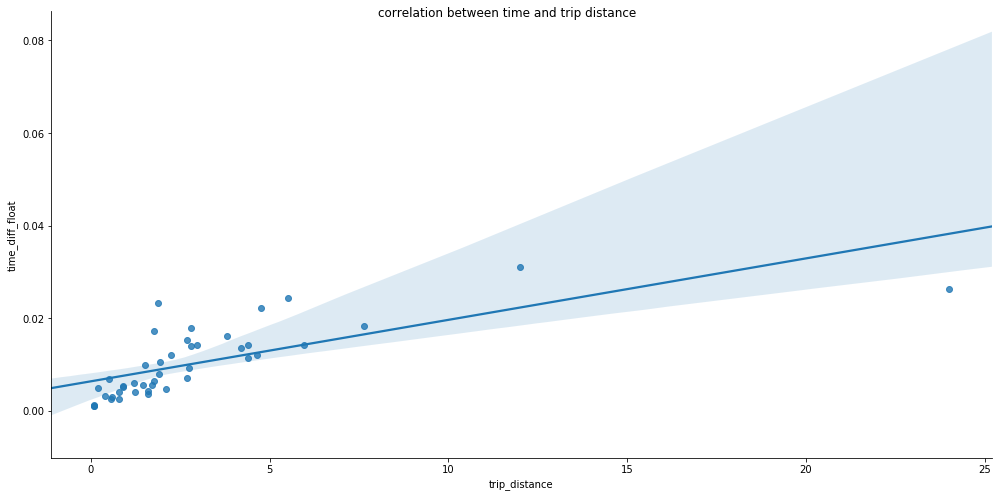

In [127]:
g = sns.pairplot(datafm2, x_vars = 'trip_distance', y_vars ='time_diff_float', height = 7, aspect = 2, kind ='reg')
g.fig.suptitle("correlation between time and trip distance")

In [86]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

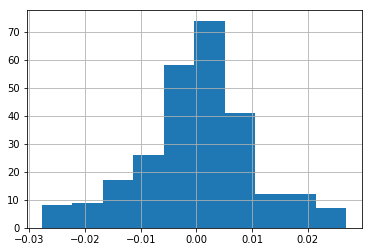

In [87]:
datafm2['time_diff_float'].diff().hist()

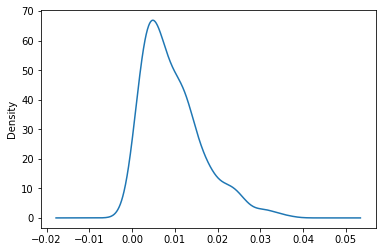

In [88]:
datafm2['time_diff_float'].plot.kde()

In [ ]:
#la disribuzione del tempo impiegato sembra seguire un andamento chi-quadro(ovviamente 
#questo risultato è da valutae per tutti i dati)
